# Data Science for Business

## Spring 2020, module 4 @ HSE

---

## Home assignment 1

<br></br>


### Task 1.
Compute statistics of total number of cases on the 10’th day since 50 confirmed cases:
1. Mean
2. Median
3. Max
4. Min

*If "March, 13" is the first day with >= 50 confirmed cases, then "March, 22" is the day you need*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
sns.set_style('darkgrid')

In [29]:
df_conf = pd.read_csv('data/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('data/time_series_covid19_deaths_global.csv')
df_rec = pd.read_csv('data/time_series_covid19_recovered_global.csv')
print(df_conf.shape)
print(df_deaths.shape)
print(df_rec.shape)
df_conf.head(3)

(264, 92)
(264, 92)
(250, 92)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,484,521,555,607,665,714,784,840,906,933
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,409,416,433,446,467,475,494,518,539,548
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534


In [30]:
df_deaths.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15,15,18,18,21,23,25,30,30,30
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,23,23,23,24,25,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,235,256,275,293,313,326,336,348,364,367


In [31]:
df_rec.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,32,32,32,32,40,43,54,99,112
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,165,182,197,217,232,248,251,277,283,302
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,347,405,460,591,601,691,708,783,846,894


In [32]:
cases_data = df_conf.groupby('Country/Region').agg('sum').drop(columns=['Lat','Long'])
deaths_data = df_deaths.groupby('Country/Region').agg('sum').drop(columns=['Lat','Long'])
rec_data = df_rec.groupby('Country/Region').agg('sum').drop(columns=['Lat','Long'])
print(cases_data.shape)
print(deaths_data.shape)
print(rec_data.shape)
cases_data.head(3)

(185, 88)
(185, 88)
(185, 88)


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,484,521,555,607,665,714,784,840,906,933
Albania,0,0,0,0,0,0,0,0,0,0,...,409,416,433,446,467,475,494,518,539,548
Algeria,0,0,0,0,0,0,0,0,0,0,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534


In [36]:
cases = cases_data.T.set_index(pd.to_datetime(cases_data.columns))
cases.head(5)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [65]:
def cases_on_day(data, min_cases=50, days='10D'):
    res = {}
    cases = data[data >= min_cases].dropna(axis=1, how='all')
    for country in cases.columns:
        if cases[country].first_valid_index() is not None:
            res[country] = cases[country].dropna().first(days)[-1]
    return res

In [74]:
res = cases_on_day(cases)
res

{'Afghanistan': 273.0,
 'Albania': 146.0,
 'Algeria': 302.0,
 'Andorra': 308.0,
 'Argentina': 387.0,
 'Armenia': 265.0,
 'Australia': 200.0,
 'Austria': 860.0,
 'Azerbaijan': 273.0,
 'Bahamas': 55.0,
 'Bahrain': 195.0,
 'Bangladesh': 330.0,
 'Barbados': 71.0,
 'Belarus': 94.0,
 'Belgium': 689.0,
 'Bolivia': 157.0,
 'Bosnia and Herzegovina': 258.0,
 'Brazil': 1021.0,
 'Brunei': 104.0,
 'Bulgaria': 218.0,
 'Burkina Faso': 246.0,
 'Burma': 98.0,
 'Cabo Verde': 58.0,
 'Cambodia': 103.0,
 'Cameroon': 233.0,
 'Canada': 415.0,
 'Chile': 746.0,
 'China': 9802,
 'Colombia': 470.0,
 'Congo (Brazzaville)': 143.0,
 'Congo (Kinshasa)': 154.0,
 'Costa Rica': 263.0,
 "Cote d'Ivoire": 194.0,
 'Croatia': 442.0,
 'Cuba': 269.0,
 'Cyprus': 179.0,
 'Czechia': 833.0,
 'Denmark': 1116.0,
 'Diamond Princess': 355.0,
 'Djibouti': 298.0,
 'Dominican Republic': 859.0,
 'Ecuador': 1403.0,
 'Egypt': 196.0,
 'El Salvador': 137.0,
 'Equatorial Guinea': 79.0,
 'Estonia': 326.0,
 'Ethiopia': 92.0,
 'Finland': 450.0,


In [123]:
cases_on_10th = pd.DataFrame.from_dict(res, orient='index', columns=['Cases'])
print('Mean: {:.2f}'.format(cases_on_10th.Cases.mean()))
print('Median: {:.2f}'.format(cases_on_10th.Cases.median()))
print('Max: {:.2f}'.format(cases_on_10th.Cases.max()))
print('Min: {:.2f}'.format(cases_on_10th.Cases.min()))

Mean: 492.57
Median: 242.00
Max: 9802.00
Min: 55.00


### Task 2.
Compute statistics of total number of deaths on last available day:
1.  Mean
2.  Median
3.  Max
4.  Min

In [132]:
print('Mean: {:.2f}'.format(deaths_data[deaths_data.columns[-1]].mean()))
print('Median: {:.2f}'.format(deaths_data[deaths_data.columns[-1]].median()))
print('Max: {:.2f}'.format(deaths_data[deaths_data.columns[-1]].max()))
print('Min: {:.2f}'.format(deaths_data[deaths_data.columns[-1]].min()))

Mean: 862.21
Median: 9.00
Max: 38664.00
Min: 0.00


### Task 3.
What was the average number of **new** cases for the last 10 days in Germany?

In [156]:
cases['Germany'].diff().last('10D').mean()

3004.6

### Task 4.
Compute case fatality rate (death to total cases ratio) for the last available day in countries with more than 10 000 reported cases (in total).
1.  What is the biggest case fatality rate? _Write percentage rounded to 2 decimal places._
2.  What is the lowest? _Write percentage rounded to 2 decimal places._
3.  Plot a scatter plot: Total number of cases vs Case fatality rate, color points according to the country.

In [157]:
deaths = deaths_data.T.set_index(pd.to_datetime(deaths_data.columns))
deaths.head(5)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
cols = cases.last('1D')[cases.last('1D') >= 10000].dropna(axis=1).columns
rates = (deaths.last('1D')[cols] / cases.last('1D')[cols])

In [270]:
rates.T.max() * 100.0

2020-04-18   14.67
dtype: float64

In [271]:
rates.T.min() * 100.0

2020-04-18   0.85
dtype: float64

In [272]:
case_ratio = cases.last('1D')[cols].rename(index=lambda x: 'Cases').T
rates = rates.rename(index=lambda x: 'Rates').T

In [273]:
case_ratio = case_ratio.join(rates)
case_ratio

,Cases,Rates
Country/Region,,
Austria,14671,0.03
Belgium,37183,0.15
Brazil,36658,0.06
Canada,34355,0.04
China,83787,0.06
France,149149,0.13
Germany,143342,0.03
India,15722,0.03
Iran,80868,0.06


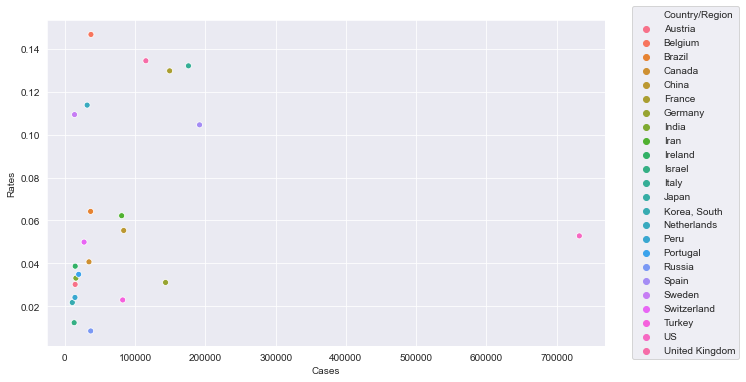

In [276]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Cases', y='Rates', hue='Country/Region', data=case_ratio.reset_index())
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()

### Task 5.
- On which weekday most cases were reported in France on average?
- On which weekday least cases were reported in Italy on average?

_Write all numbers rounded to 2 decimal places._
